<img src="https://www.freeiconspng.com/uploads/bike-png-hd-picture-3.png" />

# **Análise de Dados Exploratória**
#### **Contexto**
Uma empresa de aluguel de bicicletas da Coréia do Sul tem o interesse de prever a quantidade de alugueis de bicicletas por hora na capital do país, Seul. Com esse objetivo, esta empresa entrou em contato com a nossa empresa, de consultoria em ciência de dados, para a elaboração deste projeto.

Inicialmente, a empresa nos disponibilizou um arquivo **.csv** contendo a quantidade total de alugueis de bicicletas por hora, mas futuramente ela nos disponibilizará uma API, que será atualizada de hora em hora, com esses dados.

Um grupo de analistas de dados da nossa consultoria realizou uma pesquisa inicial de potenciais variáveis que possam ter correlação com a quantidade total de algueis por hora na cidade. Com base nisso, temos à disposição as seguintes variáveis:

|Variável|Descrição da Variável|Tipo da Variável|
|:-|:-|:-|
|Data|Data do aluguel|Data|
|Quantidade de Bicicletas Alugadas|Representa a quantidade total de bicicletas alugadas na hora de referência|Inteiro|
|Hora|Hora do aluguel|Inteiro|
|Temperatura|Temperatura, em $\small °C$|Contínuo|
|Umidade|Umidade relativa do ar, em $\small \%$|Inteiro|
|Velocidade do Vento|Velocidade do vento, em $\small m/s$|Contínuo|
|Visibilidade|Distância na qual seja capaz de discernir um objeto, em $\small 10\space m$|Inteiro|
|Temperatura de Ponto de Orvalho|Temperatura a que o ar deve ser resfriado para atingir 100% de umidade relativa|Contínuo|
|Radiação Solar|Índice de radiação solar, em $\small MJ/m^2$|Contínuo|
|Volume de Chuva|Volume de chuva, em $mm$|Contínuo|
|Volume de Neve|Volume de neve, em $cm$|Contínuo|
|Estação do Ano|Estação do ano na data do aluguel|Categórica|
|Feriado|Indica se é feriado ou não na data do aluguel|Binária|
|Dia Útil|Indica se é dia útil ou não na data do aluguel|Binária|

#### **Objetivo**

O objetivo desta análise de dados exploratória é o de identificar, por meio de diversos métodos, correlações entre as variáveis *feature* com a variável *target*, além de conseguir mais informações a respeito dos dados.

## **Pacotes**

In [1]:
from funcoes import plot_serie_temporal_padronizado
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas as pd
import numpy as np
import os

## **Carregando os Dados e Fazendo o Pré Processamento Inicial**

In [2]:
# CARREGANDO OS DADOS
df = pd.read_csv(os.getcwd() + '\\data\\seoul_bike_data.csv', sep = ',', encoding = 'unicode_escape')

# TRADUZINDO O NOME DAS COLUNAS
df.columns = [
    'data',
    'qtde_bicicletas_alugadas',
    'hora',
    'temperatura',
    'umidade',
    'velocidade_do_vento',
    'visibilidade',
    'temperatura_ponto_de_orvalho',
    'radiacao_solar',
    'volume_de_chuva',
    'volume_de_neve',
    'estacao_do_ano',
    'feriado',
    'dia_util'
]

# TRANSFORMANDO OS DADOS DE DATA EM DATETIME
df['data'] = pd.to_datetime(df['data'], format = '%d/%m/%Y')

# CRIANDO UMA COLUNA SÓ COM O MÊS E O ANO
df['ano_e_mes'] = df['data'].apply(lambda data: datetime(year = data.year, month = data.month, day = 1))

# CRIANDO UMA COLUNA COM A DATA INCLUINDO A HORA
df['data_com_hora'] = np.nan
lista_data_com_hora = []
for i in df.index:
    ano = df.loc[i, 'data'].year
    mes = df.loc[i, 'data'].month
    dia = df.loc[i, 'data'].day
    hora = df.loc[i, 'hora']
    lista_data_com_hora.append(datetime(ano, mes, dia, hora))
df['data_com_hora'] = lista_data_com_hora

# CRIANDO UMA COLUNA COM O DIA DA SEMANA
df['dia_da_semana'] = df['data'].apply(lambda data: data.weekday())

# TRANSFORMANDO OS DIAS DA SEMANA DE NÚMERO PARA NOME
dicionario_dia_semana = {
    0: 'segunda',
    1: 'terça',
    2: 'quarta',
    3: 'quinta',
    4: 'sexta',
    5: 'sabado',
    6: 'domingo'
}
df['dia_da_semana'] = df['dia_da_semana'].map(dicionario_dia_semana)

# TRADUZINDO O NOME DAS ESTAÇÕES DO ANO PARA PORTUGUÊS
dicionario_estacao_do_ano = {
    'Summer': 'verao',
    'Spring': 'primavera',
    'Autumn': 'outono',
    'Winter': 'inverno'
}
df['estacao_do_ano'] = df['estacao_do_ano'].map(dicionario_estacao_do_ano)

# TRADUZINDO OS VALORES DA COLUNA FERIADO
df['feriado'] = df['feriado'].apply(lambda feriado: 'sim' if feriado == 'Holiday' else 'nao')

# TRADUZINDO OS VALORES DA COLUNA DIA UTIL
df['dia_util'] = df['dia_util'].apply(lambda dia_util: 'sim' if dia_util == 'Yes' else 'nao')

# CRIANDO UMA LISTA COM AS VARIÁVEIS NUMERICAS E REMOVENDO VARIÁVEIS QUE NÃO SÃO NECESSÁRIAS
variaveis_numericas = df.select_dtypes(include = ['int', 'float']).columns.to_list()
variaveis_numericas = [nome_coluna for nome_coluna in variaveis_numericas if nome_coluna not in ['hora']]

# CRIANDO UMA LISTA COM AS VARIÁVEIS CATEGÓRICAS
variaves_categoricas = df.select_dtypes(include = ['object']).columns.to_list()

## **Análise**

### **Estatísticas das Variáveis**

In [3]:
# VERIFICANDO O TIPO DAS VARIÁVEIS E SE HÁ VALORES NULOS
df.info()

# ANALISANDO ESTATÍSTICAS BÁSICAS SOBRE AS VARIÁVEIS COMO MÉDIA, MEDIANA, MIN, MÁX, QUANTIS E ETC.
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   data                          8760 non-null   datetime64[ns]
 1   qtde_bicicletas_alugadas      8760 non-null   int64         
 2   hora                          8760 non-null   int64         
 3   temperatura                   8760 non-null   float64       
 4   umidade                       8760 non-null   int64         
 5   velocidade_do_vento           8760 non-null   float64       
 6   visibilidade                  8760 non-null   int64         
 7   temperatura_ponto_de_orvalho  8760 non-null   float64       
 8   radiacao_solar                8760 non-null   float64       
 9   volume_de_chuva               8760 non-null   float64       
 10  volume_de_neve                8760 non-null   float64       
 11  estacao_do_ano                

,data,qtde_bicicletas_alugadas,hora,temperatura,umidade,velocidade_do_vento,visibilidade,temperatura_ponto_de_orvalho,radiacao_solar,volume_de_chuva,volume_de_neve,ano_e_mes,data_com_hora
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,2018-05-17 06:42:24.657534464,2018-06-01 11:30:00
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,2017-12-01 00:00:00,2017-12-01 00:00:00
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,2018-03-01 00:00:00,2018-03-02 05:45:00
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2018-06-01 00:00:00,2018-06-01 11:30:00
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2018-08-01 00:00:00,2018-08-31 17:15:00
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,2018-11-01 00:00:00,2018-11-30 23:00:00
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN


### **Analisando a Distribuição das Variáveis Numéricas**

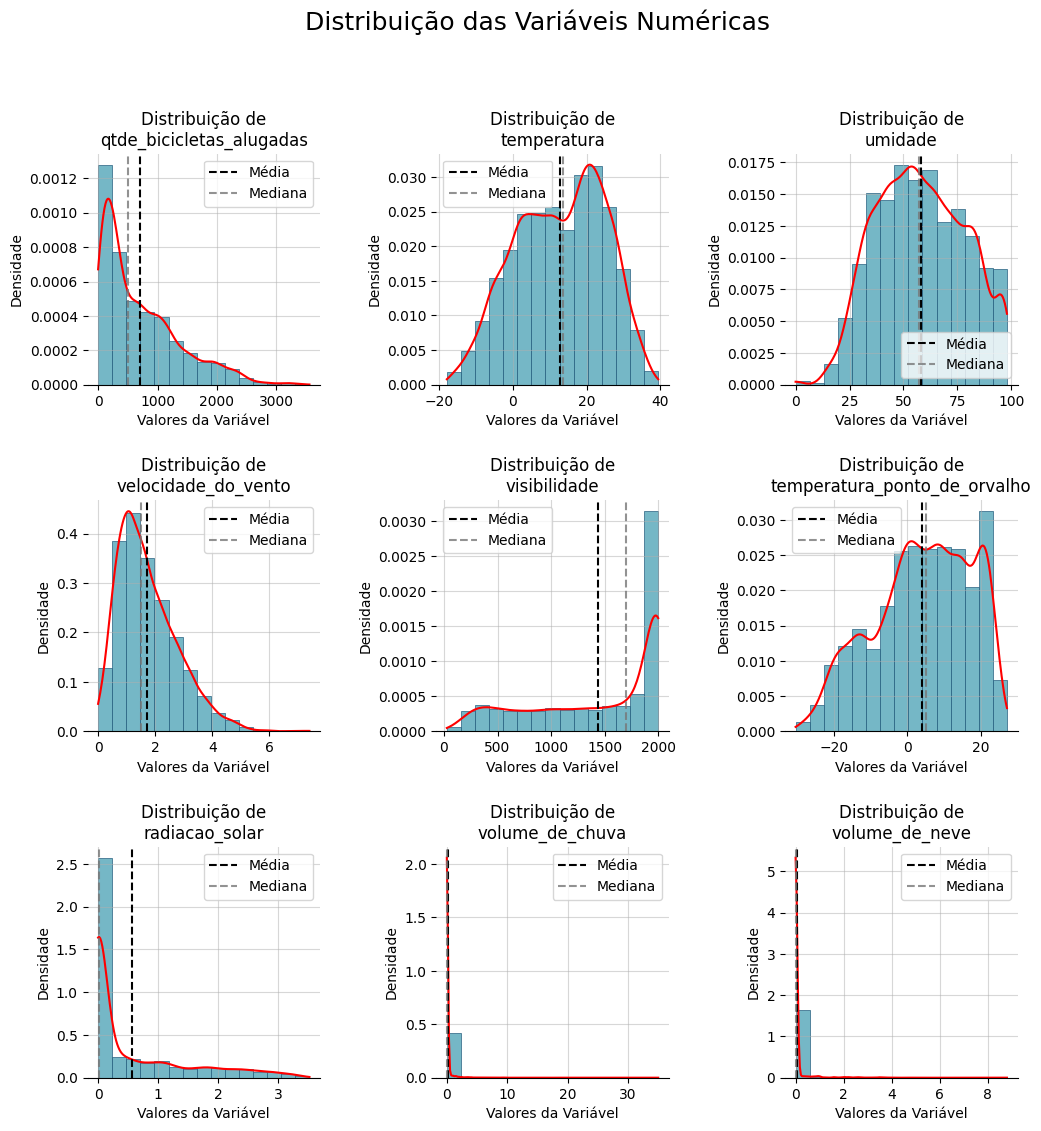

In [4]:
# PALETA DE CORES
paleta = sns.color_palette("YlGnBu_d")

# CRIANDO O GRÁFICO
plt.figure(figsize = (12,12))
plt.suptitle('Distribuição das Variáveis Numéricas', y = 1 , fontsize = 18)

for i, q in enumerate(variaveis_numericas, 1):
    plt.subplot(3,3, i)
    media = df[q].mean()
    mediana = df[q].median()
    ax = sns.histplot(df[q], kde = True, color = paleta[1], edgecolor = paleta[4], linewidth = 0.5, alpha = 0.8, stat='density', bins=15)
    ax.lines[0].set_color("red")
    sns.despine(left = True)
    plt.ylabel("Densidade")
    plt.xlabel('Valores da Variável')
    plt.axvline(x = media, color = 'black', linestyle = '--', label = 'Média')
    plt.axvline(x = mediana, color = "#777777", linestyle = '--', label = 'Mediana', alpha = 0.8)
    plt.grid(True, alpha = 0.5)  
    plt.title(f'Distribuição de\n{q}') 
    plt.legend()

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.show()

A distribuição da variável 'temperatura_ponto_de_orvalho' é parecida com o da 'temperatura'. Precisariamos analisar a correlação entre estas duas variáveis para definir se podemos escolher utilizar somente uma delas em nosso modelo, para evitar multicolinearidade caso fosse utilizado um modelo linear.

### **Analisando a Correlação Entre Variáveis**

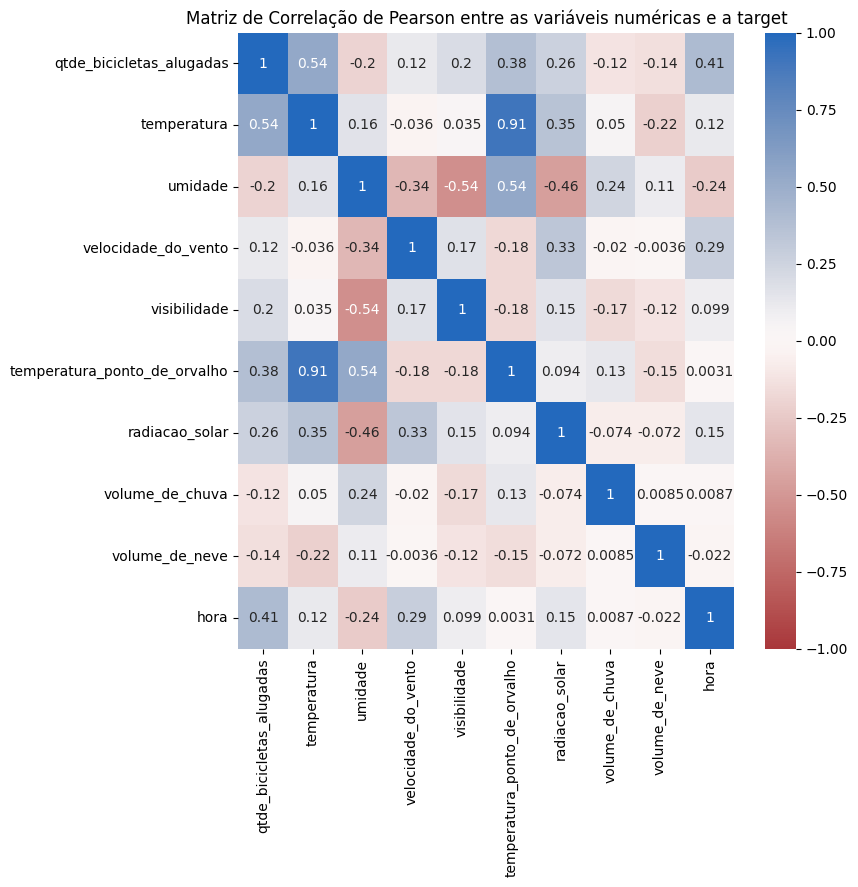

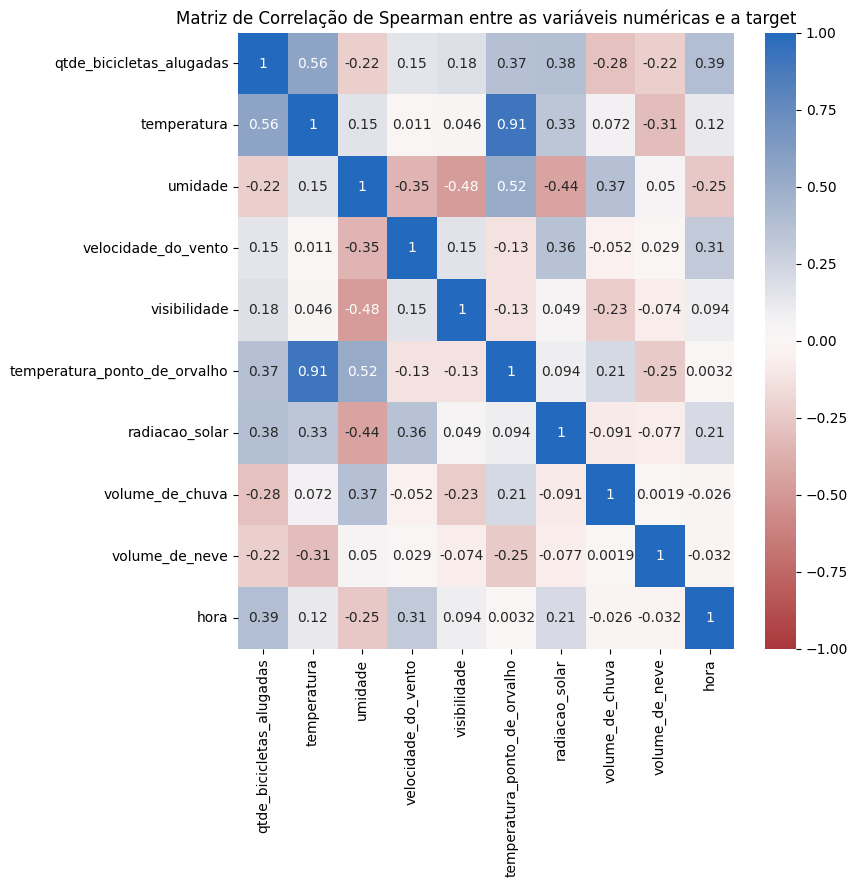

In [6]:
# CRIANDO UMA MATRIZ DE CORRELAÇÃO DE PEARSON
correlacao_de_pearson = df[variaveis_numericas + ['hora']].corr(method = 'pearson')

# CRIANDO UMA MATRIZ DE CORRELAÇÃO DE SPEARMAN
correlacao_de_spearman = df[variaveis_numericas + ['hora']].corr(method = 'spearman')

# CRIANDO UM GRÁFICO DA MATRIZ DE CORRELAÇÃO DE PEARSON
plt.figure(figsize = (8,8))
plt.title('Matriz de Correlação de Pearson entre as variáveis numéricas e a target')
sns.heatmap(correlacao_de_pearson, annot = True, cmap = sns.color_palette("vlag", as_cmap = True).reversed(), annot_kws = {"size" : 10}, vmin = -1, vmax = 1)
plt.show()

# CRIANDO UM GRÁFICO DA MATRIZ DE CORRELAÇÃO DE SPEARMAN
plt.figure(figsize = (8,8))
plt.title('Matriz de Correlação de Spearman entre as variáveis numéricas e a target')
sns.heatmap(correlacao_de_spearman, annot = True, cmap = sns.color_palette("vlag", as_cmap = True).reversed(), annot_kws = {"size" : 10}, vmin = -1, vmax = 1)
plt.show()

Na análise de correlação entre variáveis numéricas, decidi por visualizar graficamente tanto pelo método de Pearson quanto pelo método de Spearman.

No método de Pearson, a ideia é tentar identificar se há correlação linear no comportamento entre variáveis. Algumas variáveis *feature* apresentaram correlações lineares fracas ou moderadas com a *target*. São elas: temperatura (moderada), hora (fraca) e temperatura_de_ponto_de_orvalho (fraca).

No método de Spearman, tentamos identificar se há relações monotônicas entre as variáveis, sem se preocupar se elas são lineares ou não. Em relação à *target*, identificamos correlações fracas ou moderadas com as seguintes variáveis *feature*: temperatura (moderada), hora (fraca), temperatura_de_ponto_de_orvalho (fraca) e radiacao_solar (fraca).

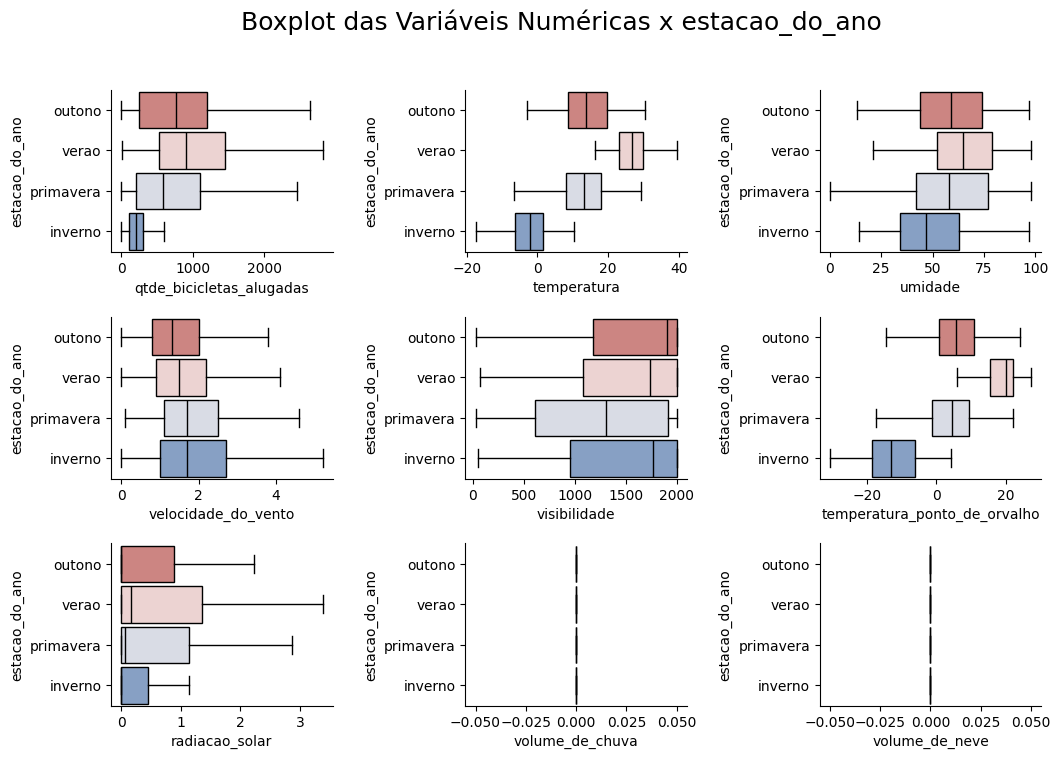

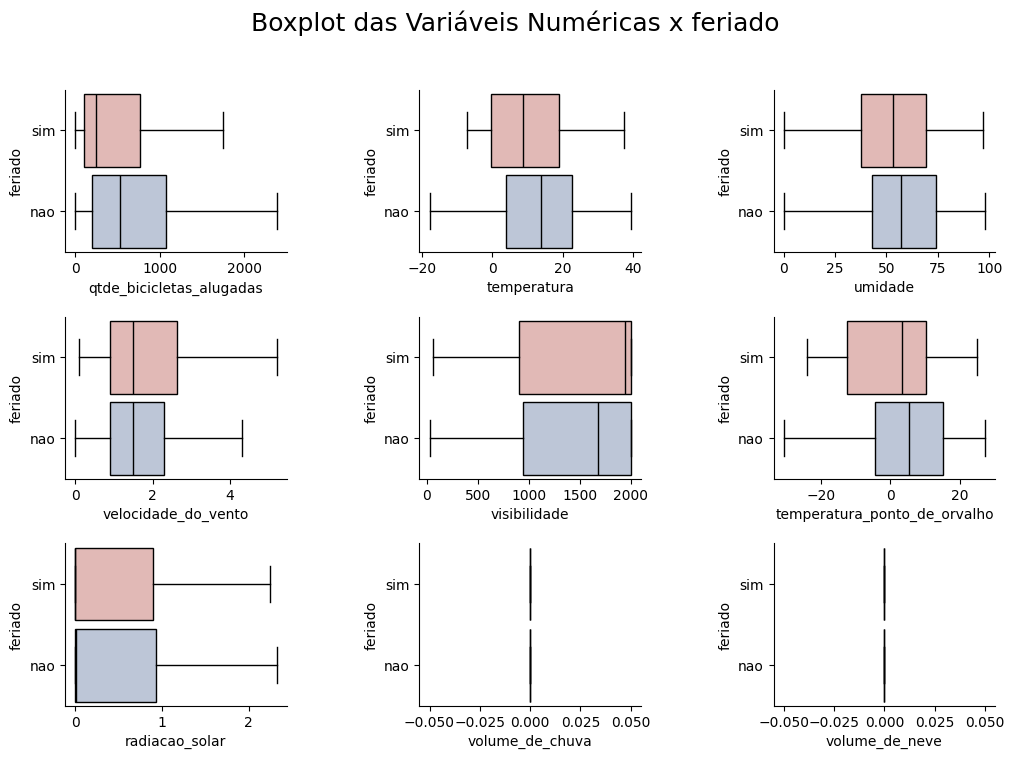

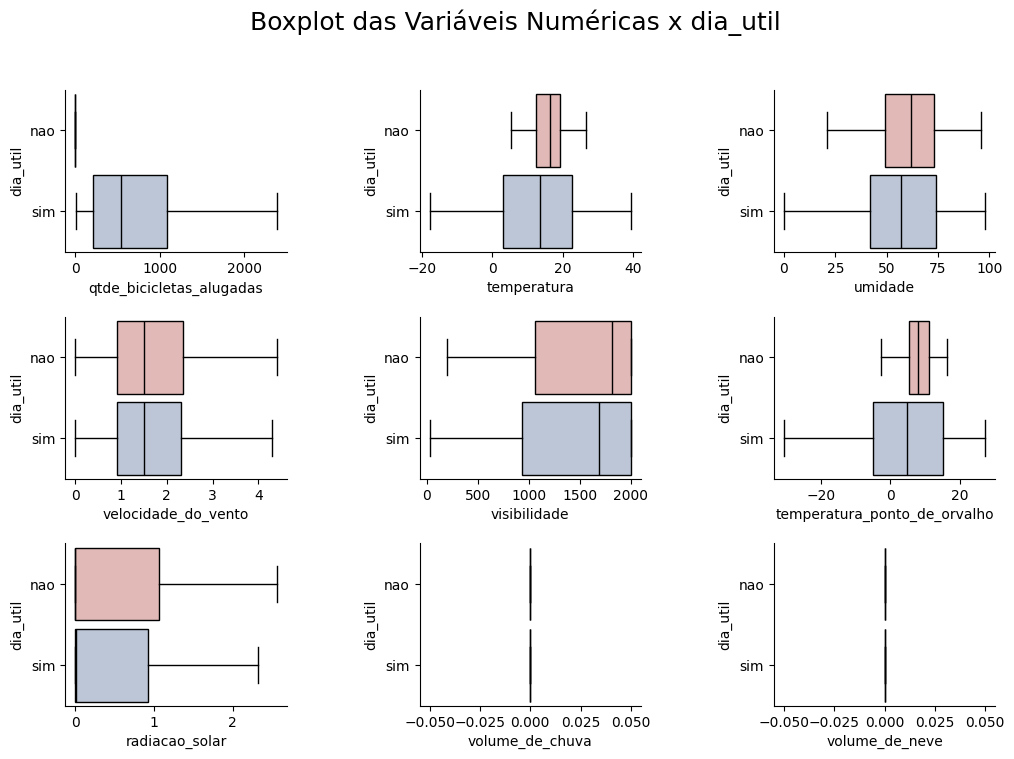

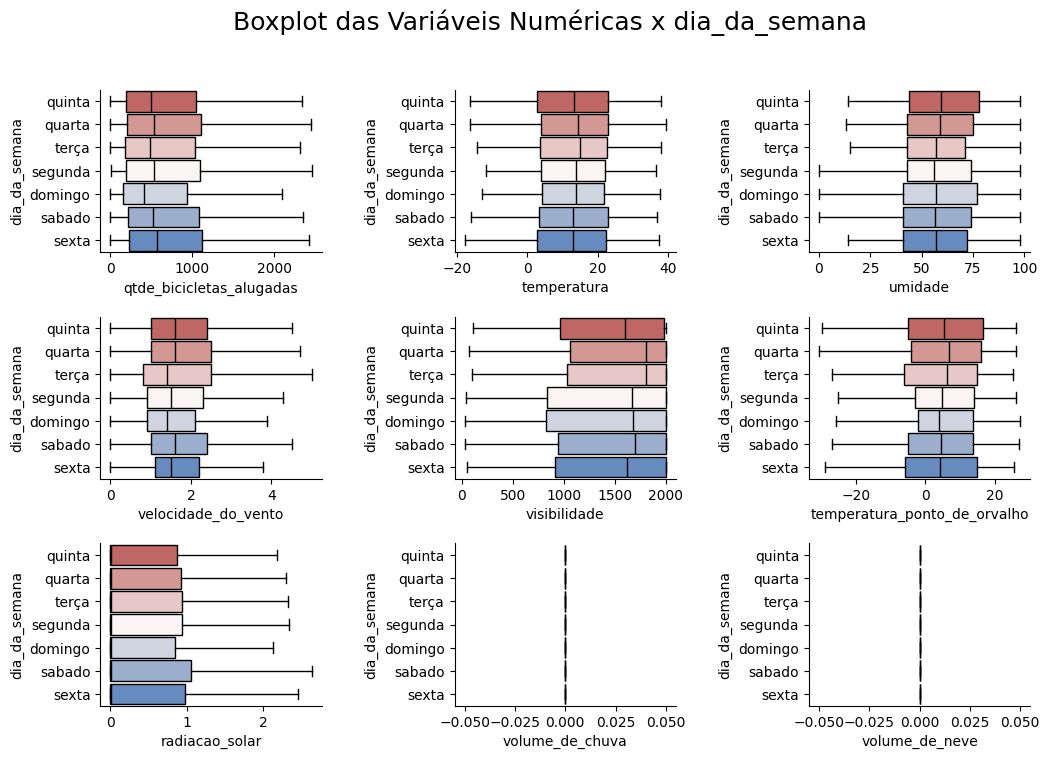

In [ ]:
# BOXPLOT DAS VARIÁVEIS NUMÉRICAS PELAS VARIÁVEIS CATEGÓRICAS
i = 3
j = 3
lista_variaveis = [variaveis_numericas[k:k+i] for k in range(0, len(variaveis_numericas), i)]
for variavel_categorica in variaves_categoricas:
    fig, ax = plt.subplots(i, j, figsize = (12,8))
    fig.suptitle(f'Boxplot das Variáveis Numéricas x {variavel_categorica}', fontsize = 18)
    for indice_linha in range(i):
        for indice_coluna in range(j):
            boxplot = ax[indice_linha, indice_coluna].boxplot([df[lista_variaveis[indice_linha][indice_coluna]][df[variavel_categorica] == nome] for nome in df[variavel_categorica].unique()], vert = False, widths = 0.9, tick_labels = df[variavel_categorica].unique(), showfliers = False, patch_artist = True, medianprops = dict(color = 'black', linewidth = 1))
            ax[indice_linha, indice_coluna].set_xlabel(lista_variaveis[indice_linha][indice_coluna])
            ax[indice_linha, indice_coluna].set_ylabel(variavel_categorica)
            for patch, cor in zip(boxplot['boxes'], sns.color_palette('vlag', n_colors = len(df[variavel_categorica].unique()))):
                patch.set_facecolor(cor)
    plt.subplots_adjust(hspace = 0.4, wspace = 0.6)
    sns.despine()
    plt.show()

### **Analisando o Comportamento da Quantidade Alugada de Bicicletas por Estação do Ano e Outras Variáveis Numéricas**

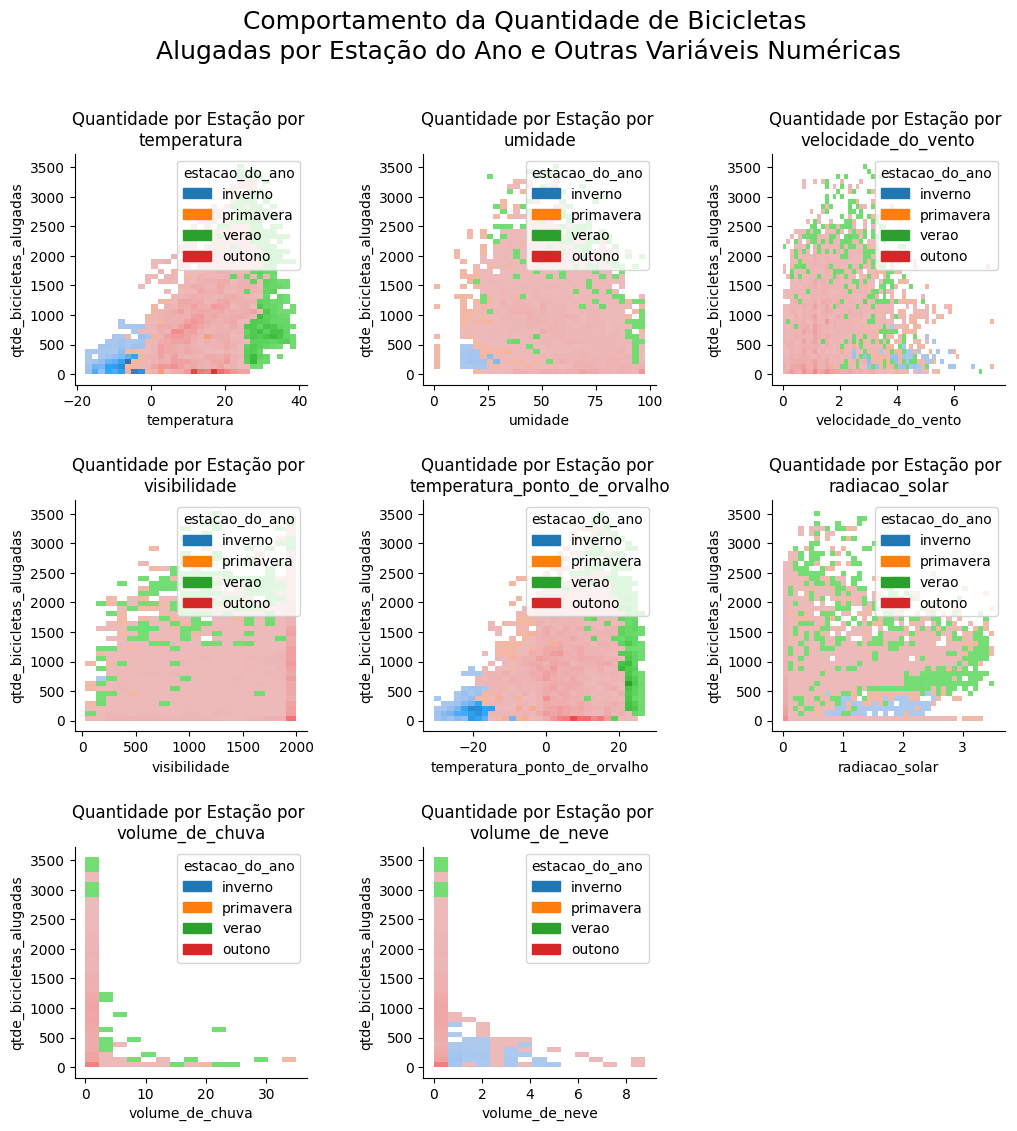

In [5]:
plt.figure(figsize = (12,12))
plt.suptitle('Comportamento da Quantidade de Bicicletas\n Alugadas por Estação do Ano e Outras Variáveis Numéricas', y = 1 , fontsize = 18)

for i, q in enumerate([coluna for coluna in variaveis_numericas if coluna not in ['qtde_bicicletas_alugadas']], 1):
    plt.subplot(3,3, i)
    sns.histplot(df, x = q, y = 'qtde_bicicletas_alugadas', hue = 'estacao_do_ano')
    sns.despine()
    plt.title(f'Quantidade por Estação por \n{q}')

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.show()

Na imagem acima, o único gráfico que dá pra tirar alguma informação é o de temperatura. Nele, além de observarmos um aumento na quantidade de bicicletas alugadas quando se aumenta a temperatura, também vemos a influência das estações do ano na temperatura.

Ou seja, se a variável 'qtde_bicicletas_alugadas' aumenta à medida em que 'temperatura' aumenta, então qualquer outra variável que tiver forte correlação com temperatura também influenciará, de algum modo, 'qtde_bicicletas_alugadas'. Este é o caso da variável 'estacao_do_ano'.

Além disso, sabemos que o intervalo de horários em que as pessoas costumam alugar uma bicicleta, 08h às 18h, é o intervalo onde geralmente ocorre a máxima de temperatura no dia. Isto é, a hora tem correlação com a temperatura. Logo, podemos realizar uma engenharia de *features* para criar uma variável categórica com as faixas de horários quais as bicicletas são mais alugadas e menos alugadas.

Aparentemente, no primeiro gráfico, o outono se sobrepõe à primavera, um indicativo de que não há diferença significativa entre estas duas estações. Logo, juntar as duas classes pode ser uma boa.

### **Analisando a Quantidade Média de Bicicletas Alugadas por Hora por Estação do Ano**


Estação do Ano: inverno
Frequência Absoluta: 2160
Frequência Relativa: 24.66%

Estação do Ano: primavera
Frequência Absoluta: 2208
Frequência Relativa: 25.21%

Estação do Ano: verao
Frequência Absoluta: 2208
Frequência Relativa: 25.21%

Estação do Ano: outono
Frequência Absoluta: 2184
Frequência Relativa: 24.93%


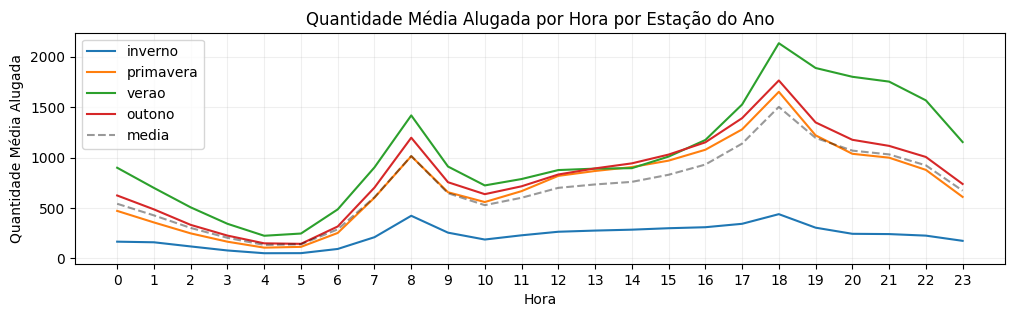

In [73]:
plt.figure(figsize = (12,3))
plt.title('Quantidade Média Alugada por Hora por Estação do Ano')
plt.xlabel('Hora')
plt.ylabel('Quantidade Média Alugada')
plt.grid(True, alpha = 0.2)

for estacao in df['estacao_do_ano'].unique():
    filtro = df['estacao_do_ano'] == estacao
    plt.plot(df[filtro]['hora'].unique(), df[filtro][['hora', 'qtde_bicicletas_alugadas']].groupby('hora').mean()['qtde_bicicletas_alugadas'], label = estacao)
    print(f"\nEstação do Ano: {estacao}\nFrequência Absoluta: {(df['estacao_do_ano'] == estacao).sum()}\nFrequência Relativa: {round(100*(df['estacao_do_ano'] == estacao).sum()/len(df), 2)}%")

plt.plot(df['hora'].unique(), df[['hora', 'qtde_bicicletas_alugadas']].groupby('hora').mean()['qtde_bicicletas_alugadas'], linestyle = 'dashed', color = 'black', alpha = 0.4, label = 'media')
plt.legend()
plt.xticks(np.arange(0, 24, 1))
plt.show()

Antes do gráfico, verifiquei se há balanceamento na quantidade de estações do ano na base de dados. Ou seja, analisei se a frequência relativa de cada estação do ano era praticamente a mesma, para podermos fazer uma análise da quantidade média alugada mais justa.

Em relação ao verão, esta foi a melhor estação do ano para a empresa, onde o volume de bicicletas alugadas ficou acima da média anual. Além disso, após às 17 horas é o período em que comumente ocorre o maior volume de bicicletas alugadas na cidade.

Em relação ao outono e à primavera, estas são estações onde o comportamento dos alugueis é bastante parecido. Por conta disso, podemos juntar estas duas classes.

Em relação ao inverno, esta é a estação do ano onde ocorrem menos alugueis de bicicletas, pois o volume fica abaixo da média anual. Além disso, os horários de pico possuem muito menos quantidade de alugueis de bicicletas, em média, do que em outras estações do ano.

### **Analisando a Série Temporal Horária Padronizada no Mês**

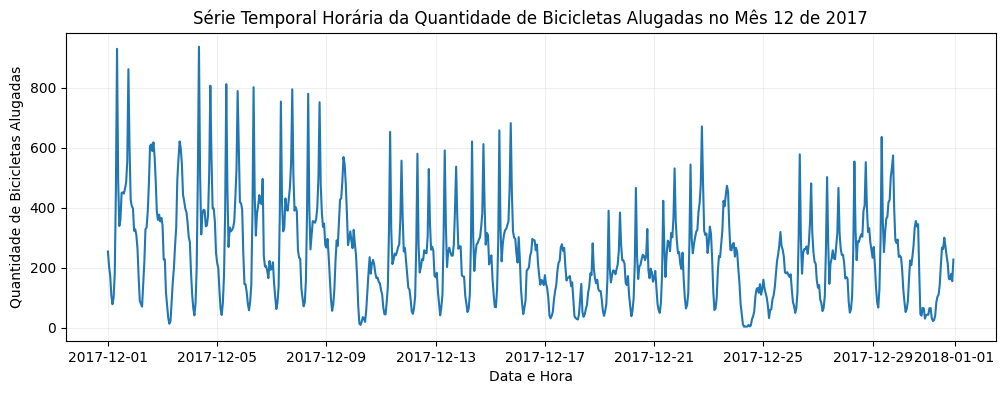

In [86]:
# CRIANDO O FILTRO
ano_e_mes = datetime(year = 2017, month = 12, day = 1)
filtro = df['ano_e_mes'] == ano_e_mes

# CRIANDO O DATAFRAME COM O FILTRO
df_filtrado = df[filtro][['data_com_hora', 'qtde_bicicletas_alugadas']]

# CRIANDO O GRÁFICO DE SÉRIE TEMPORAL HORÁRIA
plt.figure(figsize = (12,4))
plt.title(f'Série Temporal Horária da Quantidade de Bicicletas Alugadas no Mês {ano_e_mes.month} de {ano_e_mes.year}')
sns.lineplot(df_filtrado, x = 'data_com_hora', y = 'qtde_bicicletas_alugadas')
plt.xlabel('Data e Hora')
plt.ylabel('Quantidade de Bicicletas Alugadas')
plt.grid(True, alpha = 0.2)
plt.show()

Analisando a quantidade de bicicletas alugadas por hora ao longo do mês, vemos que a série possui uma sazonalidade, mas que ainda não é possível identificar com clareza a sua periodicidade.

Utilizando o meu conhecimento prévio sobre a utilização de bicicletas alugadas no dia-a-dia, acredito que o dia da semana possa influenciar neste número. Logo, por conta disso, seria interessante fazermos uma análise no período de uma semana.

### **Analisando a Série Temporal Horária na Semana**

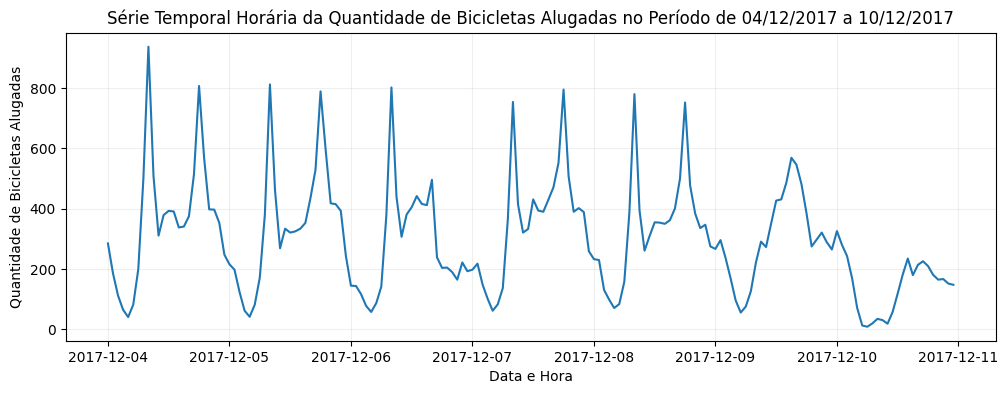

In [ ]:
# CRIANDO O FILTRO
data_inicio = datetime(year = 2017, month = 12, day = 4)
data_fim = datetime(year = 2017, month = 12, day = 10)
filtro = (df['data'] >= data_inicio) & (df['data'] <= data_fim)

# CRIANDO O DATAFRAME COM OS FILTROS
df_filtrado = df[filtro][['qtde_bicicletas_alugadas', 'data_com_hora']]

# CRIANDO O GRÁFICO DE SÉRIE TEMPORAL HORÁRIA
plt.figure(figsize = (12,4))
plt.title(f'Série Temporal Horária da Quantidade de Bicicletas Alugadas no Período de {data_inicio.strftime("%d/%m/%Y")} a {data_fim.strftime("%d/%m/%Y")}')
sns.lineplot(df_filtrado, x = 'data_com_hora', y = 'qtde_bicicletas_alugadas')
plt.xlabel('Data e Hora')
plt.ylabel('Quantidade de Bicicletas Alugadas')
plt.grid(True, alpha = 0.2)
plt.show()

Sabendo que o dia 04/12/2017 foi uma segunda-feira e o dia 10/12/2017 foi um domingo, é possível observar que os dias de semana (segunda a sexta) são os dias com maiores quantidades de bicicletas alugadas, sendo os finais de semana (sábado e domingo) os dias com menor quantidade de bicicletas alugadas.

Em relação à periodicidade da sazonalidade constatada, pode-se observar que ela é de 24 horas nesta série temporal. É possível que esta série temporal também possua uma sazonalidade diára, mas com os dados agregados em dias e não em horas, de 2 a 2 dias ou semanal, por conta da redução da quantidade de bicicletas alugadas aos finais de semana. Para verificar estas hipóteses, faremos alguns gráficos.

### **Analisando a Série Temporal Diária**

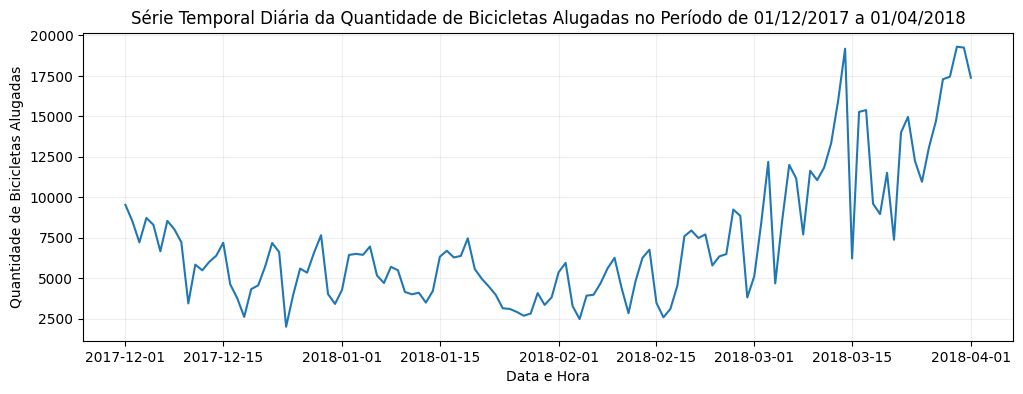

In [ ]:
# CRIANDO O FILTRO
data_inicio = datetime(year = 2017, month = 12, day = 1)
data_fim = datetime(year = 2018, month = 4, day = 1)
filtro = (df['data'] >= data_inicio) & (df['data'] <= data_fim)

# CRIANDO O DATAFRAME COM OS FILTROS
df_filtrado = df[filtro][['data', 'qtde_bicicletas_alugadas']].groupby(['data'], as_index = False).sum()

# CRIANDO O GRÁFICO DE SÉRIE TEMPORAL DIÁRIA
plt.figure(figsize = (12,4))
plt.title(f'Série Temporal Diária da Quantidade de Bicicletas Alugadas no Período de {data_inicio.strftime("%d/%m/%Y")} a {data_fim.strftime("%d/%m/%Y")}')
sns.lineplot(df_filtrado, x = 'data', y = 'qtde_bicicletas_alugadas')
plt.xlabel('Data')
plt.ylabel('Quantidade de Bicicletas Alugadas')
plt.grid(True, alpha = 0.2)
plt.show()

### **Analisando a Série Temporal de 2 a 2 dias**

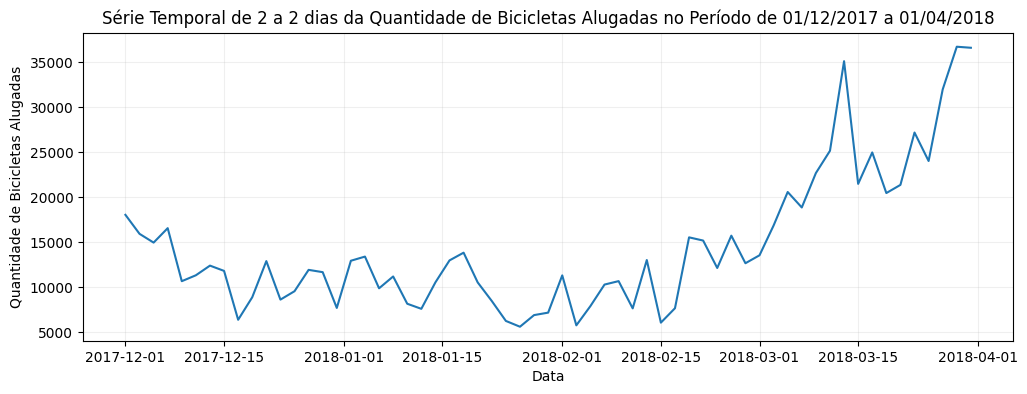

In [84]:
# CRIANDO O FILTRO
data_inicio = datetime(year = 2017, month = 12, day = 1)
data_fim = datetime(year = 2018, month = 4, day = 1)
filtro = (df['data'] >= data_inicio) & (df['data'] <= data_fim)

# CRIANDO O DATAFRAME COM OS FILTROS
df_filtrado = df[filtro][['data', 'qtde_bicicletas_alugadas']].groupby('data').sum().resample('2D').sum().reset_index()

# CRIANDO O GRÁFICO DE SÉRIE TEMPORAL DE 2 A 2 DIAS
plt.figure(figsize = (12,4))
plt.title(f'Série Temporal de 2 a 2 dias da Quantidade de Bicicletas Alugadas no Período de {data_inicio.strftime("%d/%m/%Y")} a {data_fim.strftime("%d/%m/%Y")}')
sns.lineplot(df_filtrado, x = 'data', y = 'qtde_bicicletas_alugadas')
plt.xlabel('Data')
plt.ylabel('Quantidade de Bicicletas Alugadas')
plt.grid(True, alpha = 0.2)
plt.show()

### **Analisando a Série Temporal Semanal**

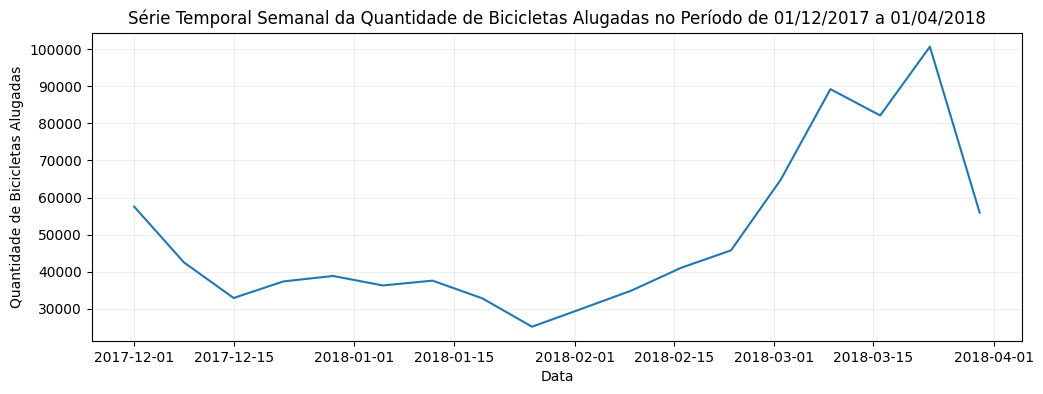

In [85]:
# CRIANDO O FILTRO
data_inicio = datetime(year = 2017, month = 12, day = 1)
data_fim = datetime(year = 2018, month = 4, day = 1)
filtro = (df['data'] >= data_inicio) & (df['data'] <= data_fim)

# CRIANDO O DATAFRAME COM OS FILTROS
df_filtrado = df[filtro][['data', 'qtde_bicicletas_alugadas']].groupby('data').sum().resample('7D').sum().reset_index()

# CRIANDO O GRÁFICO DE SÉRIE TEMPORAL SEMANAL
plt.figure(figsize = (12,4))
plt.title(f'Série Temporal Semanal da Quantidade de Bicicletas Alugadas no Período de {data_inicio.strftime("%d/%m/%Y")} a {data_fim.strftime("%d/%m/%Y")}')
sns.lineplot(df_filtrado, x = 'data', y = 'qtde_bicicletas_alugadas')
plt.xlabel('Data')
plt.ylabel('Quantidade de Bicicletas Alugadas')
plt.grid(True, alpha = 0.2)
plt.show()

Analisando graficamente por dia, por 2 a 2 dias e por semana, não foi possível confirmar as hipóteses de sazonalidade com estas agregações. Logo, podemos considerar que somente a série temporal horária possui sazonalidade, que é de 24 horas.